# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=17cf44c933e665f99c7deb8b9de72248&units=imperial&q=


In [5]:
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
city_data=[]

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units="imperial"
    query_url = f"{url}appid={api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {cities.index(city)} | {city}")
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_data.append(city)
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | kaitangata
Processing Record 1 | jamestown
Processing Record 2 | guerrero negro
Processing Record 3 | provideniya
Processing Record 4 | port alfred
Processing Record 5 | albany
Processing Record 6 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 | pevek
Processing Record 8 | nikolskoye
Processing Record 9 | nantucket
Processing Record 10 | rikitea
Processing Record 11 | puerto ayora
Processing Record 12 | shkotovo-26
City not found. Skipping...
Processing Record 13 | swedru
Processing Record 14 | cidreira
Processing Record 15 | souillac
Processing Record 16 | choucheng
City not found. Skipping...
Processing Record 17 | ushuaia
Processing Record 18 | barrow
Processing Record 19 | riyadh
Processing Record 20 | kamenka
Processing Record 21 | belushya guba
City not found. Skipping...
Processing Record 22 | nakhon phanom
Processing Record 23 | allapalli
Processing Record 24 | severo-kurilsk
Proces

Processing Record 228 | bulawayo
Processing Record 229 | kars
Processing Record 230 | warrington
Processing Record 231 | moose factory
Processing Record 232 | utrera
Processing Record 233 | inhambane
Processing Record 234 | sawakin
Processing Record 235 | terney
Processing Record 236 | noumea
Processing Record 237 | castro
Processing Record 238 | san andres
Processing Record 239 | jaguarao
Processing Record 240 | leibnitz
Processing Record 241 | glace bay
Processing Record 242 | labis
Processing Record 243 | te anau
Processing Record 244 | iquitos
Processing Record 245 | lolua
City not found. Skipping...
Processing Record 246 | san jose de las lajas
Processing Record 247 | boa vista
Processing Record 248 | aguie
Processing Record 249 | bosobolo
Processing Record 250 | saint-philippe
Processing Record 251 | qaqortoq
Processing Record 252 | andenes
City not found. Skipping...
Processing Record 253 | fort nelson
Processing Record 254 | san angelo
Processing Record 255 | ust-omchug
Process

Processing Record 457 | samusu
City not found. Skipping...
Processing Record 458 | mys shmidta
City not found. Skipping...
Processing Record 459 | asau
City not found. Skipping...
Processing Record 460 | marzuq
Processing Record 461 | taunggyi
Processing Record 462 | sao caetano do sul
Processing Record 463 | conceicao do coite
Processing Record 464 | vysokogornyy
Processing Record 465 | bremervorde
Processing Record 466 | salinopolis
Processing Record 467 | saint anthony
Processing Record 468 | thinadhoo
Processing Record 469 | zyryanka
Processing Record 470 | longyearbyen
Processing Record 471 | singarayakonda
Processing Record 472 | rapar
Processing Record 473 | seoul
Processing Record 474 | kralendijk
Processing Record 475 | coruripe
Processing Record 476 | kazachinskoye
Processing Record 477 | vendas novas
Processing Record 478 | rawson
Processing Record 479 | college
Processing Record 480 | isfana
Processing Record 481 | faanui
Processing Record 482 | taboshar
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather = pd.DataFrame({"City":city_data,"Cloudiness":cloudiness,"Country":country,"Date":date,"Humidity":humidity,
                       "Lat":lat,"Lng":lng,"Max Temp":max_temp,"Wind Speed":wind_speed})
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kaitangata,44,NZ,1538269006,96,-46.28,169.85,51.04,4.16
1,jamestown,20,AU,1538268993,36,-33.21,138.60,57.25,14.12
2,guerrero negro,0,MX,1538269275,50,27.97,-114.04,83.35,9.64
3,provideniya,92,RU,1538269010,88,64.42,-173.23,49.24,28.77
4,port alfred,0,ZA,1538268997,89,-33.59,26.89,63.37,20.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

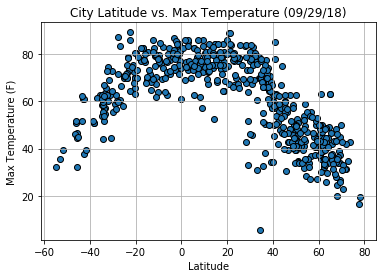

In [7]:
x_axis = weather["Lat"]
y_axis = weather["Max Temp"]
readiable = [time.ctime(x) for x in date]
weather["Date_convert"]=readiable
weather.head()
plt.scatter(x_axis,y_axis,edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (09/29/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("CityLatvsMT.png")

#### Latitude vs. Humidity Plot

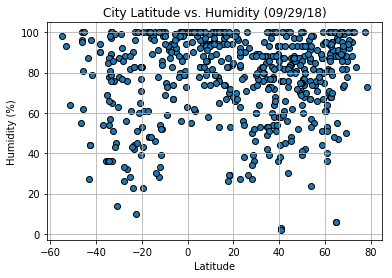

In [8]:
x_axis = weather["Lat"]
y_axis = weather["Humidity"]
plt.scatter(x_axis,y_axis,edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Humidity (09/29/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("CityLatvsHum.png")

#### Latitude vs. Cloudiness Plot

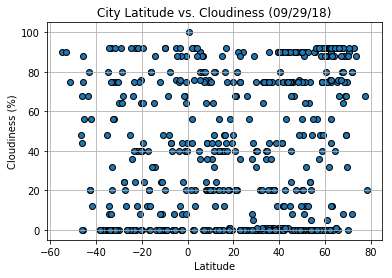

In [9]:
x_axis = weather["Lat"]
y_axis = weather["Cloudiness"]
plt.scatter(x_axis,y_axis,edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (09/29/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("CityLatvsClo.png")

#### Latitude vs. Wind Speed Plot

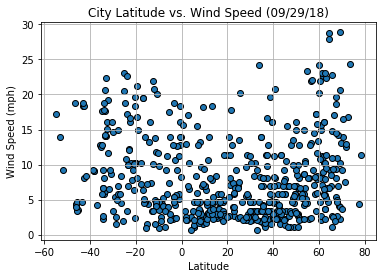

In [10]:
x_axis = weather["Lat"]
y_axis = weather["Wind Speed"]
plt.scatter(x_axis,y_axis,edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed (09/29/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("CityLatvsWS.png")

In [12]:
weather.to_csv(output_data_file)
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Date_convert
0,kaitangata,44,NZ,1538269006,96,-46.28,169.85,51.04,4.16,Sat Sep 29 20:56:46 2018
1,jamestown,20,AU,1538268993,36,-33.21,138.60,57.25,14.12,Sat Sep 29 20:56:33 2018
2,guerrero negro,0,MX,1538269275,50,27.97,-114.04,83.35,9.64,Sat Sep 29 21:01:15 2018
3,provideniya,92,RU,1538269010,88,64.42,-173.23,49.24,28.77,Sat Sep 29 20:56:50 2018
4,port alfred,0,ZA,1538268997,89,-33.59,26.89,63.37,20.60,Sat Sep 29 20:56:37 2018
